In [ ]:
#import libraries
import pandas as pd
import numpy as numpy
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data = datasets.load_iris()
data = pd.DataFrame(data.data, columns = data.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
#initialize an empty list to store WCSS values for different k
wcss = []

#try k values from 1 to 10
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,random_state=0)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

The elbow method is a technique used in clustering analysis to determine the optimal number of clusters. It involves plotting the within cluster sum of squares(WCSS) for differnt cluster numbers and identifying the "elbow" point where WCSS starts to level off.

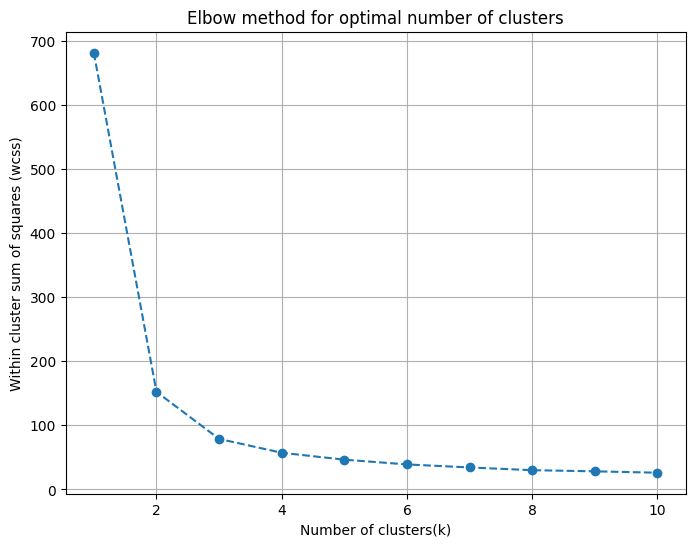

In [ ]:
#plot the WCSS values to find elbow points
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss, marker='o',linestyle='--')
plt.title('Elbow method for optimal number of clusters')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Within cluster sum of squares (wcss)')
plt.grid(True)
plt.show()

From the graph we can clearly tell that optimal number of clusters are 3

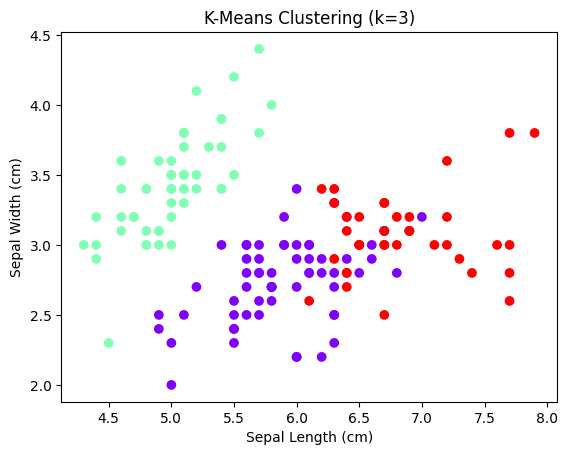

In [ ]:
k = 3
#Change this to determined optimal value

#create Kmeans model with optimal number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)

#fit the kmeans model to the data
kmeans.fit(data)

#add cluster labels to the dataframe
data['Cluster'] = kmeans.labels_

#visualize the clustres (for 2D data, you can choose any two features for plotting)
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c= data['Cluster'], cmap='rainbow')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'K-Means Clustering (k={k})')

plt.show()